In [19]:
# Importando bibliotecas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lendo arquivo
df = pd.read_csv('../data/netflix_titles.csv')

# Renomeando as colunas do dataset.
df.rename(columns = {
    'show_id': 'ID',
    'type': 'Tipo',
    'title':'Título',
    'director':'Diretor',
    'cast':'Elenco',
    'country':'País',
    'date_added':'Data_de_adição',
    'release_year':'Ano_de_lançamento',
    'rating':'Classificação',
    'duration':'Duração',
    'listed_in':'Gêneros',
    'description':'Descrição'
}, inplace = True) # Muda no dataset original.

# Renomeando os nomes da coluna tipo
df['Tipo'] = df['Tipo'].replace({'Movie':'Filmes', 'TV Show':'Séries'})

# Dicionário de Tradução
generos_traducao = {
    'International TV Shows':'Programas Internacionais',
    'Documentaries':'Documentários',
    'TV Dramas':'Dramas',
    'TV Mysteries':'Mistérios',
    'Crime TV Shows':'Programas Policiais',
    'TV Action & Adventure':'Ação e Aventura',
    'Docuseries':'Documentários',
    'Romantic TV Shows':'Programas Românticos',
    'TV Horror':'Terror',
    'Children & Family Movies':'Filmes infantis e familiares',
    'TV Comedies':'Comédia',
    'British TV Shows':'Programas Britânicos',
    'Spanish-Language TV Shows':'Programas Espanhóis',
    'International Movies':'Filmes Internacionais',
    'Thrillers':'Suspense',
    'Horror Movies':'Terror',
    'Sci-Fi & Fantasy':'Ficção Científica e Fantasia',
    "Kids' TV":'Programas infantis',
    'Action & Adventure':'Ação e Aventura',
    'LGBTQ Movies':'Filmes LGBTQ',
    'Independent Movies':'Filmes Independentes',
    'Anime Series':'Animes',
    'Anime Features':'Animação',
    'Cult Movies':'Filmes de Culto',
    'Music & Musicals':'Música e Musicais',
    'Comedies':'Comédia',
    'Movies':'Filmes',
    'Romantic Movies':'Filmes Românticos',
    'Korean TV Shows':'Programas Coreanos',
    'Classic Movies':'Filmes Clássicos',
    'Stand-Up Comedy':'Comédia Stand-Up',
    'Sports Movies':'Filmes de Esporte',
    'Faith & Spirituality':'Fé e Espiritualidade',
    'Science & Nature TV':'Ciência e Natureza',
    'TV Sci-Fi & Fantasy':'Ficção Científica e Fantasia',
    'Teen TV Shows':'Programas Adolescentes',
    'TV Thrillers':'Suspense',
    'Stand-Up Comedy & Talk Shows':'Comédia Stand-Up e Talk Shows',
    'Classic & Cult TV':'Tv Clássica',
    'TV Shows':'Programas de TV', 
}
# Função para Traduzir
def traduzir_generos(generos):
    if pd.isna(generos):
        return generos
    lista = [generos_traducao.get(g.strip(), g.strip()) for g in generos.split(',')]
    return ', '.join(lista)
# Aplicando Tradução
df['Gêneros'] = df['Gêneros'].apply(traduzir_generos)

# Tradução de Paises
traducao_paises = {
    'United States': 'Estados Unidos',
    'India': 'Índia',
    'United Kingdom': 'Reino Unido',
    'Canada': 'Canadá',
    'France': 'França',
    'Japan': 'Japão',
    'Spain': 'Espanha',
    'South Korea': 'Coreia do Sul',
    'Germany': 'Alemanha',
    'Mexico': 'México',
    'China': 'China',
    'Australia': 'Austrália',
    'Egypt': 'Egito',
    'Turkey': 'Turquia',
    'Hong Kong': 'Hong Kong',
    'Nigeria': 'Nigéria',
    'Italy': 'Itália',
    'Brazil': 'Brasil',
    'Argentina': 'Argentina',
    'Belgium': 'Bélgica',
    'Indonesia': 'Indonésia',
    'Taiwan': 'Taiwan',
    'Philippines': 'Filipinas',
    'Thailand': 'Tailândia',
    'South Africa': 'África do Sul',
    'Colombia': 'Colômbia',
    'Netherlands': 'Países Baixos',
    'Denmark': 'Dinamarca',
    'Ireland': 'Irlanda',
    'Sweden': 'Suécia',
    'Poland': 'Polônia',
    'Singapore': 'Singapura',
    'United Arab Emirates': 'Emirados Árabes Unidos',
    'New Zealand': 'Nova Zelândia',
    'Lebanon': 'Líbano',
    'Norway': 'Noruega',
    'Israel': 'Israel',
    'Chile': 'Chile',
    'Russia': 'Rússia',
    'Malaysia': 'Malásia',
    'Pakistan': 'Paquistão',
    'Czech Republic': 'República Tcheca',
    'Switzerland': 'Suíça',
    'Romania': 'Romênia',
    'Uruguay': 'Uruguai',
    'Saudi Arabia': 'Arábia Saudita',
    'Austria': 'Áustria',
    'Luxembourg': 'Luxemburgo',
    'Finland': 'Finlândia',
    'Iceland': 'Islândia',
    'Greece': 'Grécia',
    'Hungary': 'Hungria',
    'Bulgaria': 'Bulgária',
    'Qatar': 'Catar',
    'Peru': 'Peru',
    'Jordan': 'Jordânia',
    'Kuwait': 'Kuwait',
    'Vietnam': 'Vietnã',
    'Serbia': 'Sérvia',
    'Cambodia': 'Camboja',
    'Kenya': 'Quênia',
    'Portugal': 'Portugal',
    'Morocco': 'Marrocos',
    'West Germany': 'Alemanha Ocidental',
    'Ghana': 'Gana',
    'Venezuela': 'Venezuela',
    'Iran': 'Irã',
    'Croatia': 'Croácia',
    'Bangladesh': 'Bangladesh',
    'Senegal': 'Senegal',
    'Algeria': 'Argélia',
    'Zimbabwe': 'Zimbábue',
    'Soviet Union': 'União Soviética',
    'Syria': 'Síria',
    'Slovenia': 'Eslovênia',
    'Ukraine': 'Ucrânia',
    'Malta': 'Malta',
    'Nepal': 'Nepal',
    'Iraq': 'Iraque',
    'Namibia': 'Namíbia',
    'Cayman Islands': 'Ilhas Cayman',
    'Mauritius': 'Maurício',
    'Guatemala': 'Guatemala',
    'Georgia': 'Geórgia',
    'Ethiopia': 'Etiópia',
    'Burkina Faso': 'Burquina Fasso',
    'Cameroon': 'Camarões',
    'Belarus': 'Bielorrússia',
    'Angola': 'Angola',
    'Palestine': 'Palestina',
    'Paraguay': 'Paraguai',
    'Malawi': 'Malawi',
    'Cyprus': 'Chipre',
    'Puerto Rico': 'Porto Rico',
    'Mozambique': 'Moçambique',
    'Albania': 'Albânia',
    'Bermuda': 'Bermudas',
    'Slovakia': 'Eslováquia',
    'Armenia': 'Armênia',
    'Mongolia': 'Mongólia',
    'Bahamas': 'Bahamas',
    'Sri Lanka': 'Sri Lanka',
    'Latvia': 'Letônia',
    'Liechtenstein': 'Liechtenstein',
    'Cuba': 'Cuba',
    'Ecuador': 'Equador',
    'Nicaragua': 'Nicarágua',
    'Dominican Republic': 'República Dominicana',
    'Samoa': 'Samoa',
    'Azerbaijan': 'Azerbaijão',
    'Botswana': 'Botsuana',
    'Vatican City': 'Cidade do Vaticano',
    'Jamaica': 'Jamaica',
    'Kazakhstan': 'Cazaquistão',
    'Lithuania': 'Lituânia',
    'Afghanistan': 'Afeganistão',
    'Somalia': 'Somália',
    'Sudan': 'Sudão',
    'Panama': 'Panamá',
    'Uganda': 'Uganda',
    'East Germany': 'Alemanha Oriental',
    'Montenegro': 'Montenegro',
    '': 'Desconhecido'
}

# Função para traduzir paises
def traduzir_paises(paises):
    if pd.isna(paises):
        return paises
    lista_paises = [p.strip() for p in paises.split(',')]
    lista_traduzida = [traducao_paises.get(p, p) for p in lista_paises]
    return ', '.join(lista_traduzida)

# Aplicando no DataFrame
df['País'] = df['País'].apply(traduzir_paises)

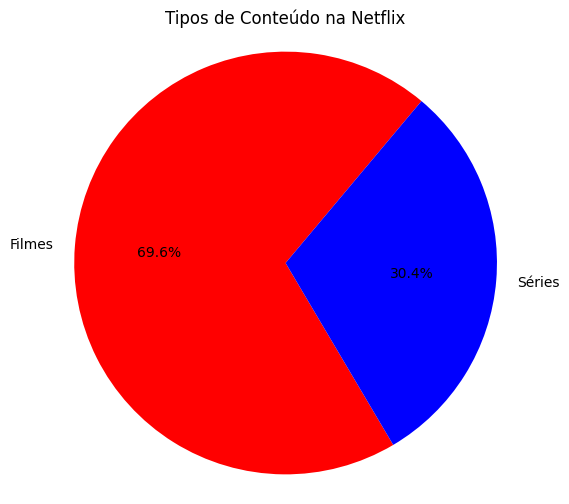

In [22]:
# Análise da quantidade de filmes e Séries
categorias = df['Tipo'].value_counts()

# Gráfico dos Tipos de conteúdo na Netflix - Gráfico Pizza
plt.figure(figsize=(6, 6))
plt.pie(categorias.values, labels=categorias.index, autopct='%1.1f%%', startangle=50, colors=['red', 'blue'])
plt.title('Tipos de Conteúdo na Netflix')
plt.axis('equal')  # Garante que o círculo fique redondinho
plt.show()

### 🎬 Análise 1: Proporção de Filmes e Séries na Netflix

O gráfico acima demonstra a distribuição dos tipos de conteúdo disponíveis na plataforma Netflix, divididos entre **Filmes** e **Séries**. Observa-se que:

- A maior parte do catálogo é composta por **Filmes**, representando uma fatia significativa do total.
- As **Séries** têm uma presença menor, embora ainda representem uma parte considerável da oferta.

Essa informação é útil para entender o foco do conteúdo da plataforma. Se o objetivo da análise for traçar o perfil do acervo, esse gráfico mostra que há uma ênfase maior em lançamentos cinematográficos do que em produções seriadas.

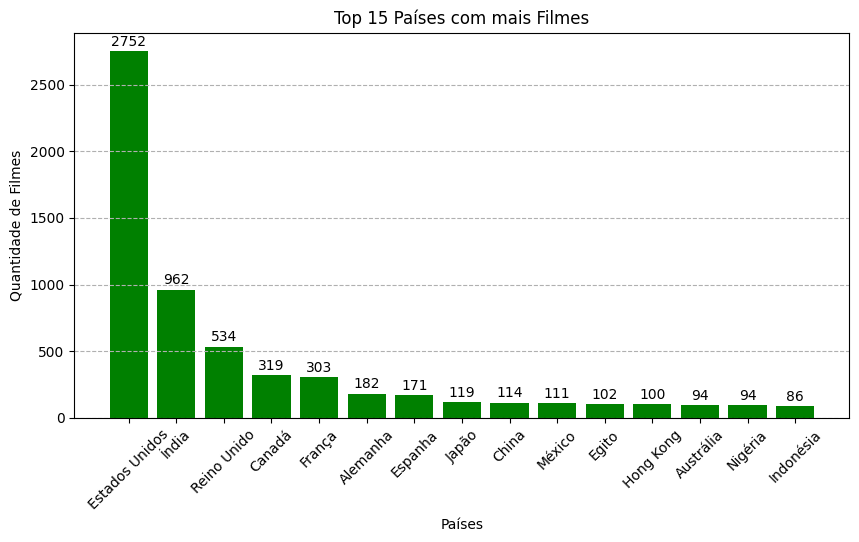

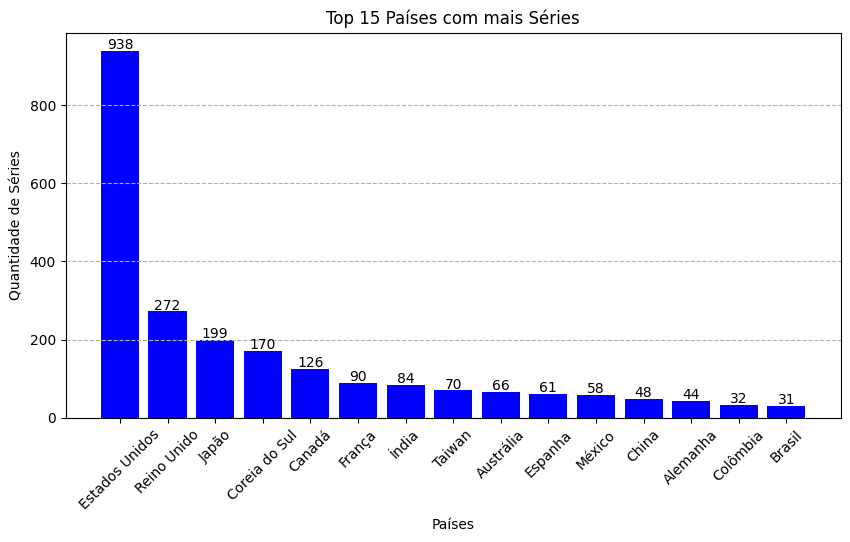

In [23]:
# Análise de filmes e séries por país

# Filtrando por Filmes e Séries
filmes = df[df['Tipo']== 'Filmes']
series = df[df['Tipo']== 'Séries']


# Função para contar paises
def contar_paises(df_tipo):
    lista_paises = []
    for linha in df_tipo['País'].dropna():
        for pais in linha.split(','):
            lista_paises.append(pais.strip())
    return pd.Series(lista_paises).value_counts()

paises_filmes = contar_paises(filmes)
paises_series = contar_paises(series)

# Top 15 filmes
top_15 = paises_filmes.head(15)

# Gráfico top 15 paises com mais filmes - Barras verticais
plt.figure(figsize=(10,5))
plt.bar(top_15.index, top_15.values, color = 'green')
for i in range(len(top_15)):
    plt.text(i, top_15.values[i]+40, top_15.values[i], ha = 'center')
plt.title('Top 15 Países com mais Filmes')
plt.xlabel('Países')
plt.xticks(rotation = 45)
plt.ylabel('Quantidade de Filmes')
plt.grid(True, axis='y', linestyle = '--', alpha=1)
plt.show()

# Top 15 séries
top_15s = paises_series.head(15)

# Gráfico top 15 paises com mais séries - Barras verticais
plt.figure(figsize=(10,5))
plt.bar(top_15s.index, top_15s.values, color = 'blue')
for i in range(len(top_15s)):
    plt.text(i, top_15s.values[i]+5, top_15s.values[i], ha = 'center')
plt.title('Top 15 Países com mais Séries')
plt.xlabel('Países')
plt.xticks(rotation=45)
plt.ylabel('Quantidade de Séries')
plt.grid(True, axis='y', linestyle = '--', alpha=1)
plt.show()

### 🌍 Análise 2 – Filmes e Séries por País

Esta análise examina os países com maior presença de títulos na plataforma da Netflix, separando os dados entre filmes e séries.

Nos **filmes**, os países com maior volume de produções são **Estados Unidos**, **Índia** e **Reino Unido**, o que reflete a forte influência dessas indústrias cinematográficas no catálogo global da plataforma.

Já nas **séries**, novamente os **Estados Unidos** lideram, seguidos por países como **Reino Unido** e **Japão**, que tem se destacado cada vez mais pela qualidade e popularidade das suas produções.

Essa separação evidencia a diversidade geográfica do conteúdo disponível, permitindo identificar quais países têm maior investimento e visibilidade na Netflix, tanto em filmes quanto em séries.



**Nota sobre países compostos**  
Alguns títulos são co-produções entre dois ou mais países. Nesta etapa da análise, os países foram mantidos agrupados, pois:
- Os gráficos atuais não são afetados.
- Co-produções podem ser analisadas posteriormente.
- A separação será feita apenas quando for relevante para a pergunta de negócio.

Isso permite maior flexibilidade e mantém a integridade dos dados originais.


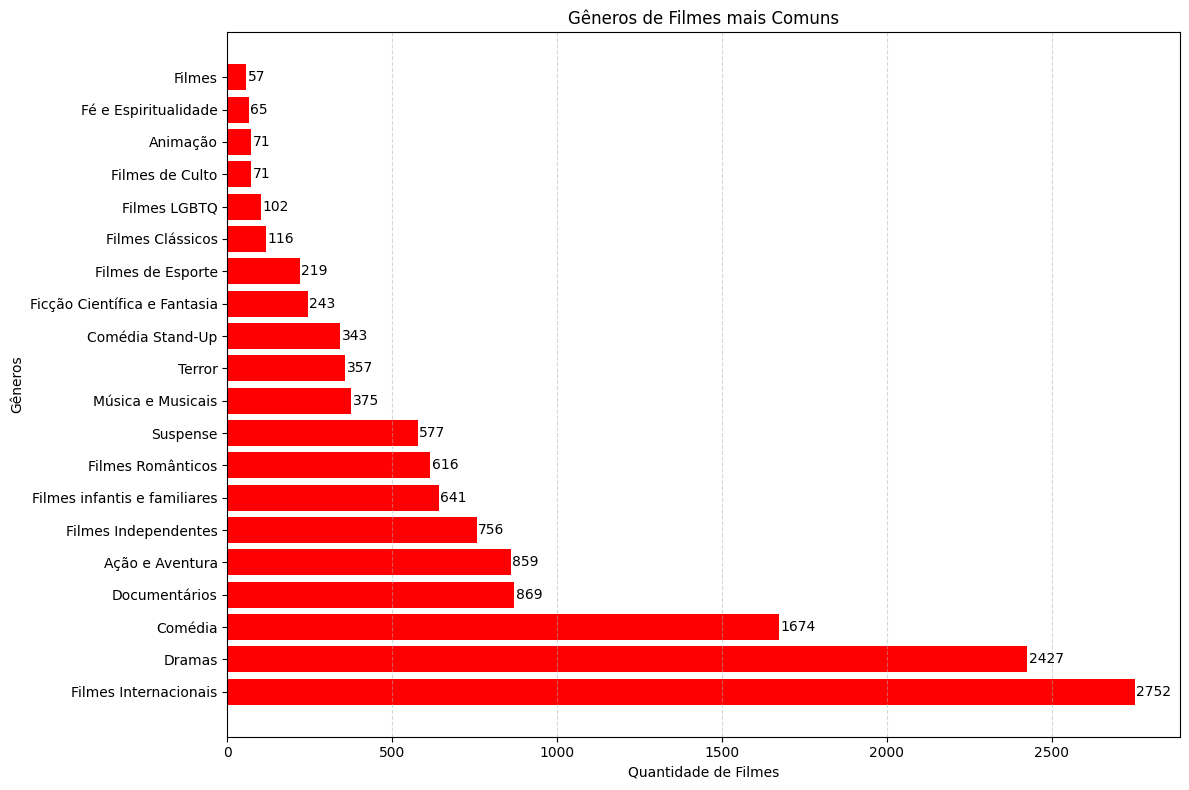

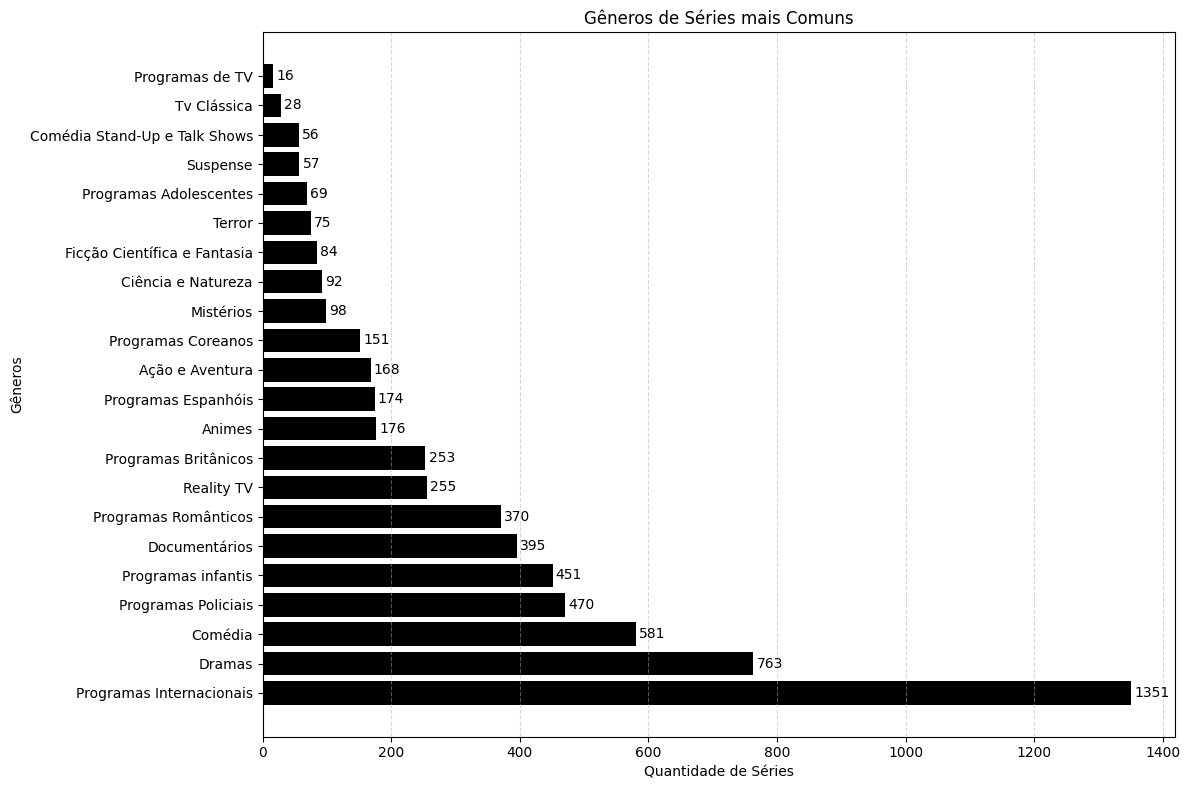

In [24]:
# Análise de Gêneros mais comuns

# Filtrando por filmes e séries
filmes = df[df['Tipo']== 'Filmes']
series = df[df['Tipo']== 'Séries']

# Função para contar gêneros
def contar_generos(df_tipo):
    lista_generos = []
    for linha in df_tipo['Gêneros'].dropna():
        for genero in linha.split(','):
            lista_generos.append(genero.strip())
    return pd.Series(lista_generos).value_counts()

# Chamando as funções
genero_filmes = contar_generos(filmes)
genero_series = contar_generos(series)

# Gráfico de gêneros de filmes - Barras horizontais
plt.figure(figsize=(12, 8))
plt.barh(genero_filmes.index, genero_filmes.values, color='red')
for i in range(len(genero_filmes)):
    plt.text(genero_filmes.values[i]+5, i, genero_filmes.values[i], va='center')
plt.title('Gêneros de Filmes mais Comuns')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Gêneros')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Gráfico de gêneros de séries - Barras horizontais
plt.figure(figsize=(12, 8))
plt.barh(genero_series.index, genero_series.values, color='black')
for i in range(len(genero_series)):
    plt.text(genero_series.values[i]+5, i, genero_series.values[i], va='center')
plt.title('Gêneros de Séries mais Comuns')
plt.xlabel('Quantidade de Séries')
plt.ylabel('Gêneros')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 🎭 Análise 3 – Gêneros Mais Comuns em Filmes e Séries

Esta visualização apresenta os gêneros mais frequentes no catálogo da Netflix, analisados separadamente para **filmes** e **séries**.

Nos **filmes**, os gêneros predominantes são **Dramas**, **Comédias** e **Documentários**. Isso indica uma preferência do público por narrativas emocionantes, envolventes e também por conteúdos informativos.

Nas **séries**, observa-se uma forte presença de **Dramas**, **Comédias** e **Programas Policiais**, revelando interesses em comum com os filmes, mas também diferenças sutis no estilo das produções seriadas.

Essa análise ajuda a entender quais tipos de conteúdo têm maior espaço na plataforma e quais estilos predominam em cada formato.

> 🔍 **Observação**: Gêneros como *"Programas internacionais"* e *"Filmes internacionais"* podem ser desconsiderados, já que praticamente todo conteúdo é originado de algum país e, portanto, seria classificado como internacional — o que torna essas categorias pouco informativas.


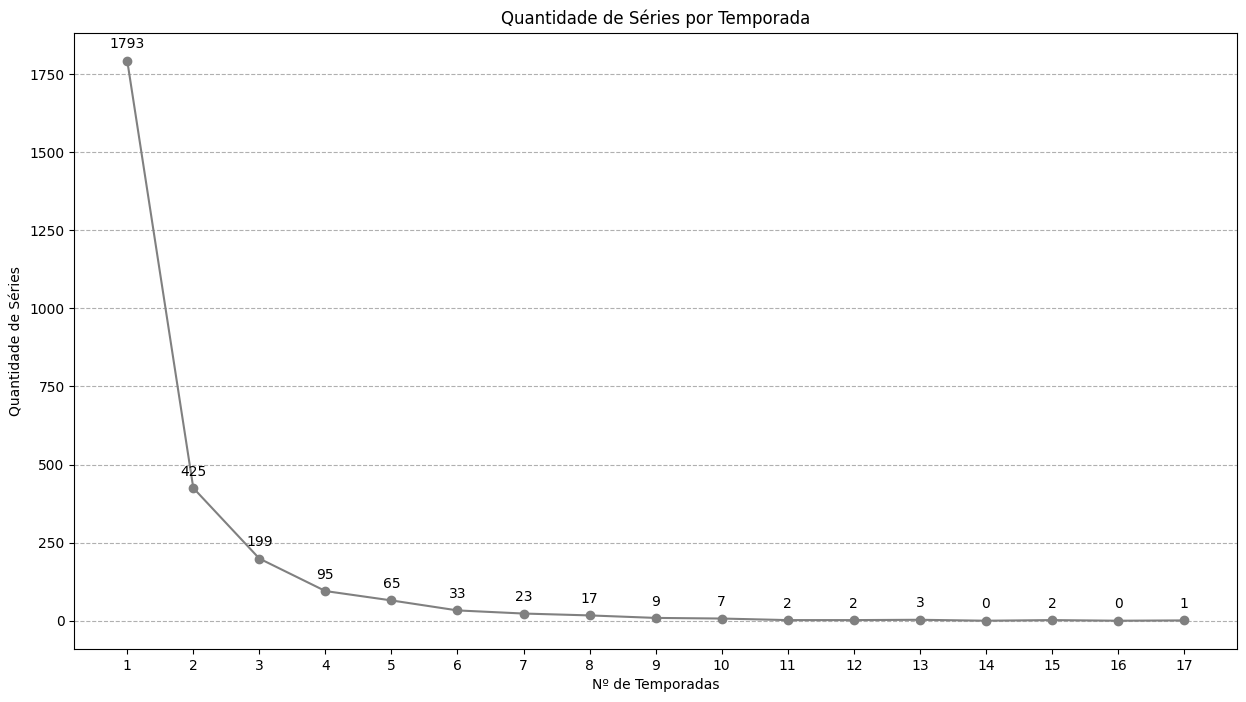

In [25]:
# Análise de Séries por temporada.
series1 = df[df['Tipo']== 'Séries']

lista_temporadas = []
# Pegando apenas os números das temporadas
for linha in series1['Duração'].dropna():
    num = linha.split(' ')[0]
    if num.isdigit():
        lista_temporadas.append(int(num))
        
# Adicionando dados faltantes
quantidade_temporadas = pd.Series(lista_temporadas).value_counts().sort_index()
todos_os_valores = pd.Series(0, index=range(min(quantidade_temporadas.index), max(quantidade_temporadas.index)+1))
quantidade_temporadas = todos_os_valores.add(quantidade_temporadas, fill_value=0).astype(int)

# Plotando gráfico de quantidade de séries por temporada - Gráfico de Linha.
plt.figure(figsize=(15,8))
plt.plot(quantidade_temporadas.index, quantidade_temporadas.values, marker='o', color='gray')
for i, valor in enumerate(quantidade_temporadas.values):
    plt.text(quantidade_temporadas.index[i], valor + 40, valor, ha='center')
plt.title('Quantidade de Séries por Temporada')
plt.xlabel('Nº de Temporadas')
plt.ylabel('Quantidade de Séries')
plt.xticks(quantidade_temporadas.index)
plt.grid(True, axis='y', linestyle='--', alpha=1)
plt.show()

### 📈 Análise 4 – Quantidade de Séries por Número de Temporadas

Este gráfico revela como as séries disponíveis na Netflix estão distribuídas em relação à quantidade de temporadas.

Observa-se uma forte concentração de séries com apenas **uma temporada**, indicando que a plataforma possui um grande número de minisséries, produções canceladas precocemente ou títulos que ainda não foram renovados. 

À medida que o número de temporadas aumenta, há uma queda gradual no número de séries, o que pode estar relacionado a fatores como custo de produção, audiência sustentada e estratégia da própria plataforma.

Séries com **muitas temporadas** (acima de 6, por exemplo) são menos frequentes, o que reforça a ideia de que a Netflix investe majoritariamente em conteúdos mais curtos e rápidos de consumir.

Essa análise ajuda a entender o perfil das séries oferecidas e o comportamento da plataforma em relação à longevidade de suas produções.
